# The Roofline Model and Performance Metrics

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import timeit

## von Neumann Architecture

In 1945, [ENIAC](https://en.wikipedia.org/wiki/ENIAC), the first electronic general purpose digital computer was put to work. John von Neumann, a mathematician working on the hydrogen bomb at Los Alamos National Laboratory in the US, became aware of the ENIAC computer and realized its potential to speedup the computations actual people were doing. He subsequently became deeply involved in the design of such computers and published an architecture still in use in modern computers which became known as the [von Neumann architecture](https://en.wikipedia.org/wiki/Von_Neumann_architecture).

![von Neumann architecture](img/von_neumann_architecture.png)

The von Neumann architecture is based on the stored-program computer concept, where the instructions to be executed as well as the data are stored in a <font color="orange">*memory unit*</font> which typically consists of RAM. The memory unit is connected to the <font color="blue">*central processing unit (CPU)*</font> via a connection called a <font color="green">*bus*</font>. The instructions need to be transferred to the *control unit* in the CPU in order to be executed. The control unit of each CPU understands a certain set of instructions. Load and store instructions are responsible for transferring data from and to the memory. The *arithmetic / logic unit* is responsible for operations on data, such as performing addition or multiplication.

<div class="alert alert-block alert-info">
<b>Now it's your turn...</b><br>
<b>1.</b> Think of some advantages / disadvantages of this computer architecture.<br>
<b>2.</b> Another popular computer architecture mostly used in microcontrollers and signal processing is the Harvard architecture. Look it up and figure out how it is different.<br>
</div>

## Clock Rate

The CPU contains a [clock](https://en.wikipedia.org/wiki/Clock_rate) which is responsible for synchronizing the operations of its components. For example, in a simple CPU, an instruction is executed every clock cycle. In modern CPUs the situation is slightly more complex since engineers have found ways to design the chip in such a manner that it may be possible to execute multiple instructions in one clock cycle using techniques such as instruction pipelining or out-of-order execution. The metric measuring the number of *clock cycles per instruction (CPI)* is often reported when investigating the performance of a program.

The clock signal transitions from 0 to 1 and back to 0 and so on with a given frequency, the *clock frequency* or *clock rate*. The clock rate is measured in hertz (Hz). Common clock rates of modern CPUs are in the range of gigahertz (GHz).

<div class="alert alert-block alert-info">
<b>Now it's your turn...</b><br>
<b>3.</b> Find out the clock frequency of the Intel Haswell CPUs of Piz Daint by inspecting the <tt>/proc/cpuinfo</tt> file.<br>
<b>4.</b> Modern CPUs have multiple cores, which each contain a control unit and an ALU. Find out the number of cores on the CPUs of Piz Daint.<br>
</div>

In [2]:
!cat /proc/cpuinfo

cat: /proc/cpuinfo: No such file or directory


In [3]:
clock_frequency = 2.6e9 # TODO
number_of_cores = 12 # TODO

## FLOP/s

In high-performance computing, a common measure of performance is the number of *floating-point operations (FLOP)*, i.e. multiplications, additions, ...) per second. This stems from the fact, that scientific programs often involve a large number of floating point operations.

![flops](img/flops.png)

The [fastest supercomputer](https://en.wikipedia.org/wiki/Fugaku_(supercomputer)) in the world currently achieves an incredible 400 Petaflops in double precision. There is a list keeping track of the fastest supercomputers called the [top500](https://www.top500.org) which is updated bi-anually.

## Theoretical Peak Performance

A processor's theoretical peak performance is an upper bound for the floating-point performance one can expect from a CPU. It is computed as

$$\mathrm{peak_{FLOPS}} = 2 \times \mathrm{cores} \times f \times n$$

where *cores* is the number of cores on a CPU, $f$ is the clock frequency, and $n$ is the number of floating-point operations the processor can perform per clock cycle. The factor of 2 in front is because most modern processors have an [multiply-accumulate](https://en.wikipedia.org/wiki/Multiply–accumulate_operation) - also called fused multiply-add - which executes a multiplication and an addition in a single instruction.

$$\mathrm{fmad}(a,b,c) = a + (b \times c)$$

The Intel E5-2690 v3 Haswell processor on Piz Daint have a value of $n=4$, meaning that they can execute 4 single precision floating point operations in a single clock cycle. This is due to so called vector registers and vector instructions. More information about the theoretical peak performance of Intel processors can be found [here](http://www.dolbeau.name/dolbeau/publications/peak.pdf).

<div class="alert alert-block alert-info">
<b>Now it's your turn...</b><br>
<b>5.</b> Compute how many floating point operations each person on Earth would have to do per second in order to achieve 400 Petaflops.<br>
<b>6.</b> Compute the theoretical peak performance of the Intel E5-2690 v3 Haswell processors you are currently working on.<br>
<b>7.</b> Take a look at the <tt>logistic_map</tt> method. Compute the number of FLOP/s that <tt>logicist_map</tt> method will execute (ignore the plotting for you calculation).<br>
<b>8.</b> Compute the fraction of theoretical peak performance we have achieved.<br>
<b>9.</b> Comment out the plotting and measure performance once again.<br>
<b>10.</b> Did you expect the resulting value? Why?<br>
</div>

In [4]:
peak_performance_in_gflops = 2 * number_of_cores * clock_frequency * 4 * 1.e-9 # TODO

execution time = 0.4581038380000013 s
performance = 0.1637183402074003 gigaflop/s
%peak =  0.00066%


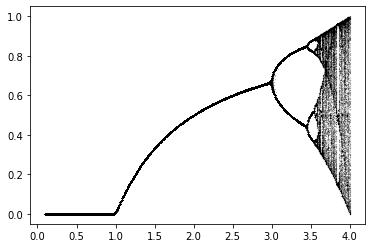

In [5]:
number_of_iterations = 100
number_of_r_values = 500
number_of_x_values = 500

def logistic_map():
    for r in np.linspace(0.1, 4., number_of_r_values):
        x = np.linspace(0.01, 0.99, number_of_x_values)
        for iter in range(number_of_iterations):
            x = r * x * ( 1. - x )
        plt.plot(np.repeat(r, number_of_x_values), x, 'k.', markersize=0.1)

# total number of floating-point operations
number_of_flop = 3 * number_of_iterations * number_of_r_values * number_of_x_values # TODO

# time the execution
t_start = timeit.default_timer()
logistic_map()
t_stop = timeit.default_timer()
execution_time = t_stop - t_start
print("execution time = {} s".format(execution_time))

# compute the flop/s
performance_in_gflops = number_of_flop / execution_time * 1.e-9 # TODO
print("performance = {} gigaflop/s".format(performance_in_gflops))

# compute fraction of peak
fraction_of_peak_performance = performance_in_gflops / peak_performance_in_gflops # TODO
print("%peak = {:8.5f}%".format(fraction_of_peak_performance))

## Memory Bandwidth

In the von Neumann architecture the memory (RAM) is connected to the CPU via a [bus](https://en.wikipedia.org/wiki/Bus_(computing)), which is a technical term for a connection between two hardware units in a computer. In the picture below of an actual Cray supercomputer the memory (RAM) is on separate hardware components next to the CPU. The electrical wires connecting the memory to the CPU and the communication protocol are collectively referd to as the memory bus. 

![xc30 node](img/xc30_node.png)

[Memory bandwidth](https://en.wikipedia.org/wiki/Memory_bandwidth) is the rate at which data can be transferred between the CPU and memory. The unit used to specify memory bandwidth of modern processors is GB/s (gigabyte/s).

## Theoretical Peak Bandwidth

Theoretical peak memory bandwidth can be calculated from the clock frequency of the memory bus $f$ (memory clock frequency), the number of channels and the width of the memory bus (number of bits)

$$\mathrm{peak_{BW}} = f_\mathrm{DDR} \times \mathrm{channels} \times \mathrm{width}$$

The Piz Daint compute nodes use DDR4 memory with a frequency of $2133 MHz$ and has a memory bus with 4 channels each 64 bits wide. See [information by Intel](https://ark.intel.com/content/www/us/en/ark/products/81713/intel-xeon-processor-e5-2690-v3-30m-cache-2-60-ghz.html) for more details.

<div class="alert alert-block alert-info">
<b>Now it's your turn...</b><br>
<b>11.</b> Use the <tt>sys.getsizeof()</tt> method to investigate the number of bytes different numpy data types occupy in memory (byte, float32, float64, int32, int64). Are you surprised by the results? Why?<br>
<b>12.</b> Try with larger array sizes (e.g. 1024 elements) and compute the average size per element. Does the size per element converge for large array sizes?<br>
<b>13.</b> Compute the theoretical peak memory bandwidth of the Intel E5-2690 v3 Haswell processors you are currently working on.<br>
<b>14.</b> Take a look at the <tt>vector_add</tt> method. Compute the total number of bytes and GB that have to be loaded from or stored to memory for the <tt>vector_add</tt> method.<br>
<b>15.</b> Run the vector addition and compute the achieved memory bandwidth in GB/s and the % of the theorical peak memory bandwidth. Is the result what you expected?<br>
</div>

In [6]:
data_types = [np.byte, np.float32, np.float64, np.int32, np.int64]
for data_type in data_types:
    x = np.empty((1), dtype=data_type)
    print('{} has a size of {} bytes'.format(data_type.__name__, sys.getsizeof(x)))

int8 has a size of 97 bytes
float32 has a size of 100 bytes
float64 has a size of 104 bytes
int32 has a size of 100 bytes
int64 has a size of 104 bytes


In [7]:
peak_bandwidth_in_gbs = 2133*1e6 * 4 * 64/8 / 1024**3 # TODO
print("peak memory bandwidth = {} GB/s".format(peak_bandwidth_in_gbs))

peak memory bandwidth = 63.5683536529541 GB/s


In [8]:
def vector_add(a, b, c):
    c[:] = a[:] + b[:]

num_elements = 128 * 1024 * 1024
a = np.random.rand( num_elements )
b = np.random.rand( num_elements )
c = np.empty( num_elements, dtype=np.float64 )

# compute the number of bytes loaded/stored from/to memory
number_of_bytes = 8 * 3 * num_elements # TODO
number_of_gbytes = number_of_bytes / 1024**3 # TODO
print("memory transferred = {} GB".format(number_of_gbytes))

# time the execution
t_start = timeit.default_timer()
vector_add(a, b, c)
t_stop = timeit.default_timer()
execution_time = t_stop - t_start
print("execution time = {:8.5f} s".format(execution_time))

# memory bandwidth
memory_bandwidth_in_gbs = number_of_gbytes / execution_time # TODO
print("memory bandwidth = {:8.5f} GB/s".format(memory_bandwidth_in_gbs))

# compute fraction of peak
fraction_of_peak_bandwidth = memory_bandwidth_in_gbs / peak_bandwidth_in_gbs
print("%peak = {:8.5f}%".format(fraction_of_peak_bandwidth))

memory transferred = 3.0 GB
execution time =  1.33069 s
memory bandwidth =  2.25448 GB/s
%peak =  0.03547%


## Arithmetic intensity

Weather and climate models need to perform operations (e.g. integrating partial differential equations) on data (e.g. prognostic variables such as density, pressure or wind stored on a mesh). The *arithmetic intensity* or *operational intensity* $I$ is a measure that relates the amount of work $W$ (floating-point operations) to the amount of data $Q$ (bytes) that needs to be transferred to the CPU.

$$I = \frac{W}{Q} \,\, [\mathrm{flop}/\mathrm{byte}]$$

Often, the artihmetic intensiy is expressed as a function of input size $n$, namely $I(n) = W(n)/Q(n)$ and approximated in the limit of large $n$.

Computer programs with low arithmetic intensity $I << 1$ are called *memory bound*. Programs with high arithmetic intensity $I >> 1$ are called *compute bound*. The transition point from compute bound to memory bound is hardware dependent and depends on the achievable FLOPs and memory bandwidth values.

<div class="alert alert-block alert-info">
<b>Now it's your turn...</b><br>
<b>16.</b> Determine the asymptotic value of the arithmetic intensity $I(n)$ for large $n$ for the following vector/matrix operations in double precision (<tt>float64</tt>).

$$
\begin{eqnarray}
y && = && \alpha x + y \,\,\,\,  && \alpha \in \mathbb{R}; \,\, x, y \in \mathbb{R}^n \\
y && = && \mathrm{A} x + y \,\,\,\,  && x, y \in \mathbb{R}^n; \,\, \mathrm{A} \in \mathbb{R}^{n \times n} \\
y && = && \mathrm{A} \mathrm{B} + \mathrm{C} \,\,\,\,  && \mathrm{A}, \mathrm{B}, \mathrm{C} \in \mathbb{R}^{n \times n} \\
\end{eqnarray}
$$
    
Assume that the values of $\mathrm{A}$, $\mathrm{B}$, and $\mathrm{C}$ only have to be transferred from memory once.<br>
<b>17.</b> Assume that the theoretical peak values of FLOPS and memory bandwidth are actually achievable on the Intel E5-2690 v3 processor. At what arithmetic intensity $I_\mathrm{transition}$ would a computer program switch from compute bound to memory bound?<br>
<b>18.</b> Consider the one-dimensional heat equation in a domain $x \in [0, L]$ with periodic boundary conditions
    
$$
\begin{eqnarray}
\frac{\partial T}{\partial t} && = && \alpha \frac{\partial^2 T}{\partial^2}\\
T(x,0) && = && \cos \left( \frac{2 \pi}{L} x \right)\\
\end{eqnarray}
$$
    
where $T = T(x,t)$ is the temperature and $\alpha > 0\,m^2/s$ is the diffusion coefficient. Discretize the spatial dimension using constant $\Delta x = L / n$ where $n$ is the number of gridpoints. Discretize in time using a simple Euler forward scheme with $\Delta t$. Now compute the operational intensity $I(n)$ for the scheme assuming the computation is done in double precision (<tt>float64</tt>).
</div>

## Roofline model

The Roofline model ([Williams et al. 2009](https://dl.acm.org/doi/10.1145/1498765.1498785)) is a simple and intuitive model that can give insight into how to improve the performance of a computer program or an individual kernel inside such a program. It shows the performance of the kernel in the context of hardware limitations (memory bandwidth, peak performance) and can help guide optimizations.

If a kernel is compute bound, optimizations should target techniques such as vectorization, pipelining, better instruction mix, etc. If a kernel is memory bound, optimizations should aim at a reduction of memory transfers. The roofline model immediately shows how close to theoretical peak performance (the roofline) a kernel is. 

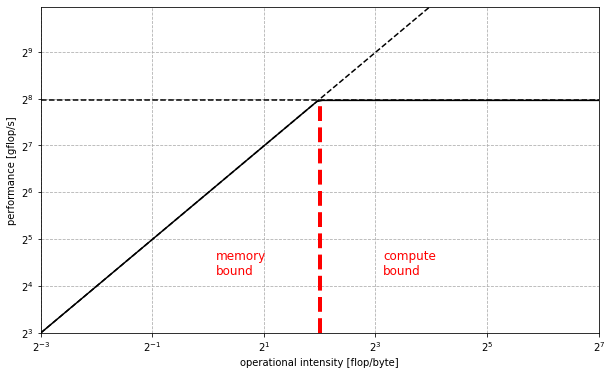

In [44]:
operational_intensity = 2 ** np.linspace(-3, 7, 100)
roofline = np.minimum( operational_intensity * peak_bandwidth_in_gbs, peak_performance_in_gflops )
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xscale("log", basex=2)
ax.set_yscale("log", basey=2)
xlim = ( np.min(operational_intensity), np.max(operational_intensity) )
ylim = ( np.min(roofline), 4 * peak_performance_in_gflops )
ax.plot( operational_intensity, roofline, 'k-');
ax.plot( operational_intensity, np.repeat(peak_performance_in_gflops, 100), 'k-', linestyle="dashed" );
ax.plot( operational_intensity, operational_intensity * peak_bandwidth_in_gbs, 'k-', linestyle="dashed" );
ax.text( 1.1, 19, 'memory\nbound', color='red', fontsize=12)
ax.plot( [4,4], [ylim[0], peak_performance_in_gflops ], 'r', linewidth=4, linestyle="dashed")
ax.text( 8.8, 19, 'compute\nbound', color='red', fontsize=12)
#ax.plot( matmul_intensity, matmul_gflops, 'b.')
#ax.text( 1.1*matmul_intensity, matmul_gflops, "matmul", color='blue')
plt.xlabel("operational intensity [flop/byte]");
plt.ylabel("performance [gflop/s]");
plt.xlim( xlim )
plt.ylim( ylim );
plt.grid(True, which="both", ls='--');
plt.show()

<div class="alert alert-block alert-info">
<b>Now it's your turn...</b><br>
<b>19.</b> TODO<br>
</div>

In [39]:
n = 8 * 1024
A = np.random.rand(n, n)
B = np.random.rand(n, n)

t_start = timeit.default_timer()
C = A.dot(B)
t_stop = timeit.default_timer()
execution_time = t_stop - t_start

matmul_flops = n * n * n / execution_time
matmul_intensity = matmul_flops / ( 3 * n * n * 8 )
matmul_gflops = matmul_flops * 1.e-9